In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bioAI.mplstyle")
import torch
import scipy
from scipy.spatial import Voronoi, voronoi_plot_2d

from methods import phase_kde, activity_kde
from models import RobustSimilitude, Similitude2
from plotting_functions import scatter3d
from utils import rotation_matrix, create_board

In [2]:
model = RobustSimilitude()

In [3]:
mesh = model.unit_cell.mesh(64,endpoints=True)

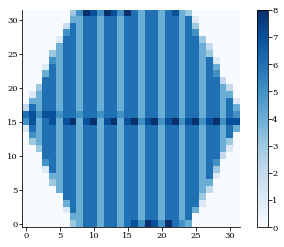

In [4]:
hist2d = scipy.stats.binned_statistic_2d(mesh[:, 0], mesh[:, 1], values=np.zeros_like(mesh[:,0]), statistic="count", bins=32).statistic
plt.imshow(hist2d.T, origin="lower")
plt.colorbar()

In [5]:
create_board(10).shape

torch.Size([64, 64, 2])

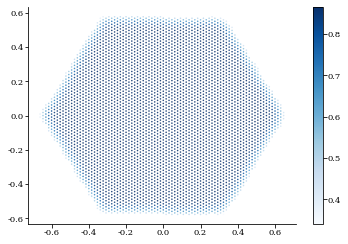

In [6]:
kde_f = scipy.stats.gaussian_kde(mesh.T,bw_method=0.1)
plt.scatter(*mesh.T,c=kde_f(mesh.T))
plt.colorbar()

In [7]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [8]:
mesh = np.mgrid[-1:1:4j,-1:1:4j]
mesh.shape

(2, 4, 4)

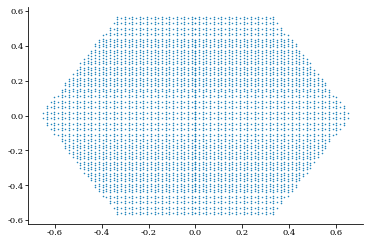

In [9]:
mesh = np.mgrid[-1:1:64j,-1:1:64j].reshape(2,-1).T
plt.scatter(*model.unit_cell.wrap(mesh).T)